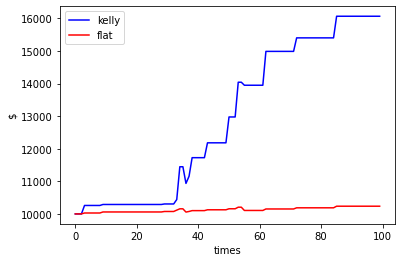

In [4]:
import random
import matplotlib.pyplot as plt

class Game:
    def __init__(self):
        self.value = 0
        return
    def random(self):
        self.value = random.random()

    def play(self,p,bet,odds):
        if (self.value>p):
            return 0
        else:
            return bet * odds

class Flat:
    def __init__(self,bet,game,n):
        self.bet = bet
        self.game = game
        self.flat = bet/n

    def formula(self,p,odds):
        if p*odds <1:
            return 0
        return self.flat
    
    def play(self,p,odds):
        bet = self.formula(p,odds)
        self.bet = self.bet - bet + self.game.play(p,bet,odds)

class Kelly:
    def __init__(self,bet,game):
        self.bet = bet
        self.game = game

    def formula(self,p,odds):
        bet = (p*odds-1)/odds
        if bet > 0:
            return bet
        return 0

    def play(self,p,odds):
        bet = self.bet * self.formula(p,odds)
        self.bet = self.bet - bet + self.game.play(p,bet,odds)
        

if __name__ == "__main__":
    n = 100
    bet = 10000
    game = Game()
    kelly = Kelly(bet,game)
    flat = Flat(bet,game,n)

    kelly_y = []
    flat_y = []

    for i in range(0,n):
        p = random.random()
        odds = random.uniform(1, 1.5)
        game.random()
        kelly.play(p,odds)
        flat.play(p,odds)
        kelly_y.append(kelly.bet)
        flat_y.append(flat.bet)
        
    fig,ax = plt.subplots()
    plt.xlabel("times")
    plt.ylabel("$")

    x = [*range(0,n)]
    plt.plot(x,kelly_y,"b",label="kelly")
    plt.plot(x,flat_y,"r",label="flat")
    plt.legend(loc="upper left")
    plt.savefig("kelly-criterion.png")
    plt.show()